In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ranksums
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.metrics import cohen_kappa_score

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

sns.set(font_scale=3.8)
sns.set(rc={'figure.figsize':(5,3.5)})
# sns.set(font="Verdana")
sns.set(font="sans-serif")
sns.set_style(style='white')
sns.set_style("ticks", {'grid.linestyle': '-.'})

In [2]:
raw_data_all = pd.read_csv('results_summary_analysis_refined.csv')
raw_data_all


,LLM,Algorithm,Task,Monika,Wei-Qi,Eric
0,A,Dementia_1,1,3,3,2
1,A,Dementia_1,2,2,2,2
2,A,Dementia_1,3,3,2,1
3,A,Dementia_2,1,3,3,2
4,A,Dementia_2,2,2,2,2
...,...,...,...,...,...,...
67,D,hypo_1,2,1,1,2
68,D,hypo_1,3,1,1,1
69,D,hypo_2,1,2,1,1
70,D,hypo_2,2,1,1,1


In [3]:
set(raw_data_all['Algorithm'])

{'Dementia_1', 'Dementia_2', 'T2DM_1', 'T2DM_2', 'hypo_1', 'hypo_2'}

In [7]:
cohen_kappa_score(raw_data_all['Monika'], raw_data_all['Wei-Qi'], weights='quadratic')

0.6917808219178083

In [8]:
cohen_kappa_score(raw_data_all['Monika'], raw_data_all['Eric'], weights='quadratic')

0.505091649694501

In [9]:
cohen_kappa_score(raw_data_all['Wei-Qi'], raw_data_all['Eric'], weights='quadratic')

0.5827814569536424

## 1. compare different LLMs

In [10]:
L_A = raw_data_all[raw_data_all['LLM']=='A']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='A']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='A']['Eric'].tolist()
L_B = raw_data_all[raw_data_all['LLM']=='B']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='B']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='B']['Eric'].tolist()
L_C = raw_data_all[raw_data_all['LLM']=='C']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='C']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='C']['Eric'].tolist()
L_D = raw_data_all[raw_data_all['LLM']=='D']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='D']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='D']['Eric'].tolist()
print(np.mean(L_A), mean_confidence_interval(L_A))
print(np.mean(L_B), mean_confidence_interval(L_B))
print(np.mean(L_C), mean_confidence_interval(L_C))
print(np.mean(L_D), mean_confidence_interval(L_D))
L = L_A + L_B + L_C + L_D
LLM_name_list = ['ChatGPT-4']*len(L_A) + ['ChatGPT-3.5']*len(L_B) + ['Claude 2']*len(L_C) + ['Bard']*len(L_D)
merge = [[i,j] for i,j in zip(LLM_name_list, L)]
merge_pd = pd.DataFrame(merge, columns=["Large language model", "Score"])
merge_pd

2.574074074074074 (2.574074074074074, 2.401431865944799, 2.746716282203349)
2.425925925925926 (2.425925925925926, 2.253283717796651, 2.598568134055201)
1.9074074074074074 (1.9074074074074074, 1.6807824260498097, 2.134032388765005)
1.2037037037037037 (1.2037037037037037, 1.0927415674765513, 1.3146658399308562)


,Large language model,Score
0,ChatGPT-4,3
1,ChatGPT-4,2
2,ChatGPT-4,3
3,ChatGPT-4,3
4,ChatGPT-4,2
...,...,...
211,Bard,2
212,Bard,1
213,Bard,1
214,Bard,1


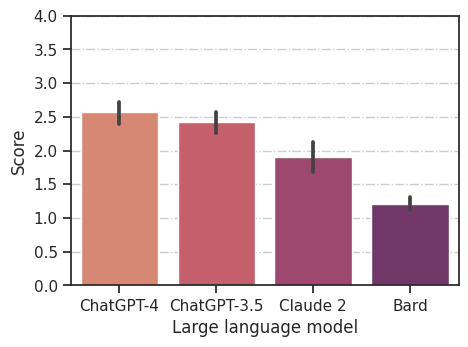

In [11]:
ax = sns.barplot(x = "Large language model", y = "Score", palette = "flare", data=merge_pd)
plt.ylim(0.0, 4.0)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
plt.savefig('LLM_compare.pdf', dpi=300, bbox_inches = 'tight')

In [12]:
print(ranksums(L_A, L_B))
print(ranksums(L_A, L_C))
print(ranksums(L_A, L_D))
print(ranksums(L_B, L_C))
print(ranksums(L_B, L_D))
print(ranksums(L_C, L_D))

RanksumsResult(statistic=1.2288916969096244, pvalue=0.2191124149652781)
RanksumsResult(statistic=3.9109478254148797, pvalue=9.193463209009999e-05)
RanksumsResult(statistic=7.652923042504686, pvalue=1.9646149725146275e-14)
RanksumsResult(statistic=3.0998793054545275, pvalue=0.001935995148459249)
RanksumsResult(statistic=7.3825668691845685, pvalue=1.5526650494033757e-13)
RanksumsResult(statistic=4.190520686461819, pvalue=2.78315037812239e-05)


### what if only comparing beta-prompting


In [13]:
# L_A = raw_data_all[raw_data_all['LLM']=='A' && raw_data_all['Algorithm']=='Dementia_2']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='A']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='A']['Eric'].tolist()
# L_B = raw_data_all[raw_data_all['LLM']=='B']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='B']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='B']['Eric'].tolist()
# L_C = raw_data_all[raw_data_all['LLM']=='C']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='C']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='C']['Eric'].tolist()
# L_D = raw_data_all[raw_data_all['LLM']=='D']['Monika'].tolist() + raw_data_all[raw_data_all['LLM']=='D']['Wei-Qi'].tolist() + raw_data_all[raw_data_all['LLM']=='D']['Eric'].tolist()
# print(np.mean(L_A))
# print(np.mean(L_B))
# print(np.mean(L_C))
# print(np.mean(L_D))
# L = L_A + L_B + L_C + L_D
# LLM_name_list = ['ChatGPT-4']*len(L_A) + ['ChatGPT-3.5']*len(L_B) + ['Claude 2']*len(L_C) + ['Bard']*len(L_D)
# merge = [[i,j] for i,j in zip(LLM_name_list, L)]
# merge_pd = pd.DataFrame(merge, columns=["Large language model", "Score"])
# merge_pd

In [14]:
L_A_only_2 = raw_data_all[(raw_data_all['LLM']=='A') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Monika'].tolist() + raw_data_all[(raw_data_all['LLM']=='A') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Wei-Qi'].tolist() + raw_data_all[(raw_data_all['LLM']=='A') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Eric'].tolist()
L_B_only_2 = raw_data_all[(raw_data_all['LLM']=='B') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Monika'].tolist() + raw_data_all[(raw_data_all['LLM']=='B') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Wei-Qi'].tolist() + raw_data_all[(raw_data_all['LLM']=='B') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Eric'].tolist()
L_C_only_2 = raw_data_all[(raw_data_all['LLM']=='C') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Monika'].tolist() + raw_data_all[(raw_data_all['LLM']=='C') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Wei-Qi'].tolist() + raw_data_all[(raw_data_all['LLM']=='C') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Eric'].tolist()
L_D_only_2 = raw_data_all[(raw_data_all['LLM']=='D') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Monika'].tolist() + raw_data_all[(raw_data_all['LLM']=='D') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Wei-Qi'].tolist() + raw_data_all[(raw_data_all['LLM']=='D') & ((raw_data_all['Algorithm']=='Dementia_2') | (raw_data_all['Algorithm']=='T2DM_2') | (raw_data_all['Algorithm']=='hypo_2'))]['Eric'].tolist()
print(np.mean(L_A_only_2))
print(np.mean(L_B_only_2))
print(np.mean(L_C_only_2))
print(np.mean(L_D_only_2))
L_only_2 = L_A_only_2 + L_B_only_2 + L_C_only_2 + L_D_only_2
LLM_name_list_only_2 = ['ChatGPT-4']*len(L_A_only_2) + ['ChatGPT-3.5']*len(L_B_only_2) + ['Claude 2']*len(L_C_only_2) + ['Bard']*len(L_D_only_2)
merge_only_2 = [[i,j] for i,j in zip(LLM_name_list_only_2, L_only_2)]
merge_pd_only_2 = pd.DataFrame(merge_only_2, columns=["Large language model", "Score"])
merge_pd_only_2


2.6666666666666665
2.4444444444444446
1.962962962962963
1.1111111111111112


,Large language model,Score
0,ChatGPT-4,3
1,ChatGPT-4,2
2,ChatGPT-4,3
3,ChatGPT-4,3
4,ChatGPT-4,3
...,...,...
103,Bard,1
104,Bard,1
105,Bard,1
106,Bard,1


In [15]:
raw_data_all['Algorithm']

0     Dementia_1
1     Dementia_1
2     Dementia_1
3     Dementia_2
4     Dementia_2
         ...    
67        hypo_1
68        hypo_1
69        hypo_2
70        hypo_2
71        hypo_2
Name: Algorithm, Length: 72, dtype: object

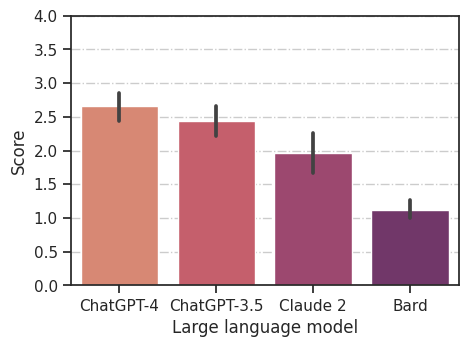

In [16]:
ax = sns.barplot(x = "Large language model", y = "Score", palette = "flare", data=merge_pd_only_2)
plt.ylim(0.0, 4.0)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
# plt.savefig('LLM_compare_only_2.pdf', dpi=300, bbox_inches = 'tight')

In [17]:
print(ranksums(L_A_only_2, L_B_only_2))
print(ranksums(L_A_only_2, L_C_only_2))
print(ranksums(L_A_only_2, L_D_only_2))
print(ranksums(L_B_only_2, L_C_only_2))
print(ranksums(L_B_only_2, L_D_only_2))
print(ranksums(L_C_only_2, L_D_only_2))

RanksumsResult(statistic=1.1936983810476685, pvalue=0.23259597401867171)
RanksumsResult(statistic=2.8717961051291736, pvalue=0.00408146211951359)
RanksumsResult(statistic=5.864692046016806, pvalue=4.49967028885851e-09)
RanksumsResult(statistic=1.9808473134776527, pvalue=0.04760839904858858)
RanksumsResult(statistic=5.501392538741428, pvalue=3.768032457769497e-08)
RanksumsResult(statistic=3.503245248726853, pvalue=0.00045962606940060243)


## 2. compare alpha with beta prompting 

In [18]:
raw_data_all = pd.read_csv('results_summary_analysis_refined.csv')
# raw_data_all = raw_data_all[(raw_data_all['LLM']=='A') | (raw_data_all['LLM']=='B')]


In [19]:
new_cols = [s.split('_') for s in raw_data_all['Algorithm'].tolist()]
raw_data_all['Phenotype'] = list(np.transpose(new_cols)[0])
raw_data_all['Prompting'] = list(np.transpose(new_cols)[1])
raw_data_all

,LLM,Algorithm,Task,Monika,Wei-Qi,Eric,Phenotype,Prompting
0,A,Dementia_1,1,3,3,2,Dementia,1
1,A,Dementia_1,2,2,2,2,Dementia,1
2,A,Dementia_1,3,3,2,1,Dementia,1
3,A,Dementia_2,1,3,3,2,Dementia,2
4,A,Dementia_2,2,2,2,2,Dementia,2
...,...,...,...,...,...,...,...,...
67,D,hypo_1,2,1,1,2,hypo,1
68,D,hypo_1,3,1,1,1,hypo,1
69,D,hypo_2,1,2,1,1,hypo,2
70,D,hypo_2,2,1,1,1,hypo,2


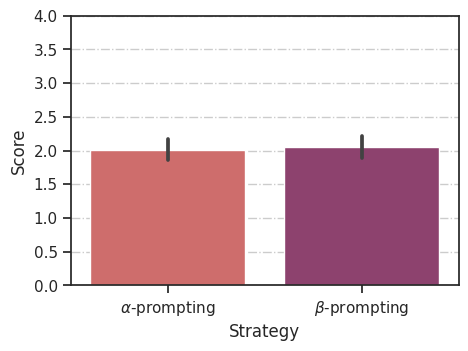

In [21]:
raw_data_all_alpha = raw_data_all[raw_data_all['Prompting']=='1']
raw_data_all_beta = raw_data_all[raw_data_all['Prompting']=='2']

alpha = raw_data_all_alpha['Monika'].tolist() + raw_data_all_alpha['Wei-Qi'].tolist() + raw_data_all_alpha['Eric'].tolist()
beta = raw_data_all_beta['Monika'].tolist() + raw_data_all_beta['Wei-Qi'].tolist() + raw_data_all_beta['Eric'].tolist()
alpha_beta = alpha + beta
prompting_name = [r'$\alpha$-prompting']*len(alpha) + [r'$\beta$-prompting']*len(alpha)
merge = [[i,j] for i,j in zip(prompting_name, alpha_beta)]
merge_pd = pd.DataFrame(merge, columns=['Strategy', 'Score'])

ax = sns.barplot(x = "Strategy", y = "Score", palette = "flare", data=merge_pd)
plt.ylim(0.0, 4.0)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
plt.savefig('prompting_compare.pdf', dpi=300, bbox_inches = 'tight')

In [29]:
print(ranksums(alpha, beta))

RanksumsResult(statistic=-0.32007690234842834, pvalue=0.7489100345955414)


## compare scores between phenotypes

In [23]:
raw_data_all = pd.read_csv('results_summary_analysis_refined.csv')
new_cols = [s.split('_') for s in raw_data_all['Algorithm'].tolist()]
raw_data_all['Phenotype'] = list(np.transpose(new_cols)[0])
raw_data_all['Prompting'] = list(np.transpose(new_cols)[1])
raw_data_all_dementia = raw_data_all[raw_data_all['Phenotype']=='Dementia']
raw_data_all_T2DM = raw_data_all[raw_data_all['Phenotype']=='T2DM']
raw_data_all_hypo = raw_data_all[raw_data_all['Phenotype']=='hypo']

# raw_data_all_dementia = raw_data_all[(raw_data_all['Phenotype']=='Dementia') & ((raw_data_all['LLM']=='A') | (raw_data_all['LLM']=='B'))]
# raw_data_all_T2DM = raw_data_all[(raw_data_all['Phenotype']=='T2DM')& ((raw_data_all['LLM']=='A') | (raw_data_all['LLM']=='B'))]
# raw_data_all_hypo = raw_data_all[(raw_data_all['Phenotype']=='hypo')& ((raw_data_all['LLM']=='A') | (raw_data_all['LLM']=='B'))]

data_all_dementia = raw_data_all_dementia['Monika'].tolist() + raw_data_all_dementia['Wei-Qi'].tolist() + raw_data_all_dementia['Eric'].tolist()
data_all_T2DM = raw_data_all_T2DM['Monika'].tolist() + raw_data_all_T2DM['Wei-Qi'].tolist() + raw_data_all_T2DM['Eric'].tolist()
data_all_hypo = raw_data_all_hypo['Monika'].tolist() + raw_data_all_hypo['Wei-Qi'].tolist() + raw_data_all_hypo['Eric'].tolist()
phenotype_name = ['T2DM']*len(data_all_dementia) + ['Dementia']*len(data_all_T2DM) + ['Hypothyroidism']*len(data_all_hypo) 
all_phenotype = data_all_T2DM + data_all_dementia + data_all_hypo
merge = [[i,j] for i,j in zip(phenotype_name, all_phenotype)]
merge_pd = pd.DataFrame(merge, columns=['Phenotype', 'Score'])
merge_pd


,Phenotype,Score
0,T2DM,3
1,T2DM,3
2,T2DM,3
3,T2DM,3
4,T2DM,3
...,...,...
211,Hypothyroidism,2
212,Hypothyroidism,1
213,Hypothyroidism,1
214,Hypothyroidism,1


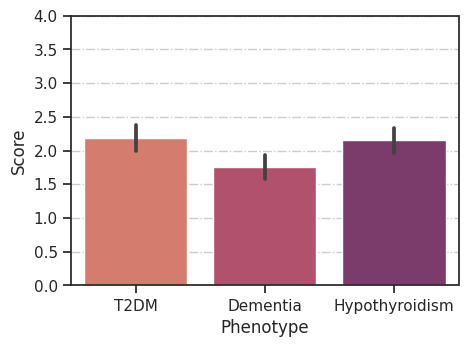

In [24]:
ax = sns.barplot(x = "Phenotype", y = "Score", palette = "flare", data=merge_pd)
plt.ylim(0.0, 4.0)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
# plt.savefig('phenotype_compare.pdf', dpi=300, bbox_inches = 'tight')

In [25]:
print(ranksums(data_all_dementia, data_all_T2DM))
print(ranksums(data_all_dementia, data_all_hypo))
print(ranksums(data_all_T2DM, data_all_hypo))

RanksumsResult(statistic=-2.944703776622734, pvalue=0.003232639952506882)
RanksumsResult(statistic=-2.7129631809047985, pvalue=0.006668451542611049)
RanksumsResult(statistic=0.15982110049512804, pvalue=0.8730220019430637)


## radar chart

In [27]:
raw_data_all = pd.read_csv('results_summary_analysis_refined.csv')
new_cols = [s.split('_') for s in raw_data_all['Algorithm'].tolist()]
raw_data_all['Phenotype'] = list(np.transpose(new_cols)[0])
raw_data_all['Prompting'] = list(np.transpose(new_cols)[1])
raw_data_all

tmp = raw_data_all.groupby(['LLM', 'Task'])
computed_ = []
for name, entries in tmp:
    data_all_task = entries['Monika'].tolist() + entries['Wei-Qi'].tolist() + entries['Eric'].tolist()
    data_all_task_mean = np.mean(data_all_task)
    computed_.append(data_all_task_mean)
    
computed_df = pd.DataFrame(list(np.array(computed_).reshape((4,3))), columns = ['Instruction following', 'Algorithmic logic', 'SQL executability'])
computed_df['LLM'] = ['ChatGPT-4', 'ChatGPT-3.5', 'Claude 2', 'Bard']
computed_df = computed_df.set_index('LLM')
computed_df


,Instruction following,Algorithmic logic,SQL executability
LLM,,,
ChatGPT-4,2.888889,2.444444,2.388889
ChatGPT-3.5,2.888889,2.055556,2.333333
Claude 2,2.166667,1.833333,1.722222
Bard,1.388889,1.166667,1.055556


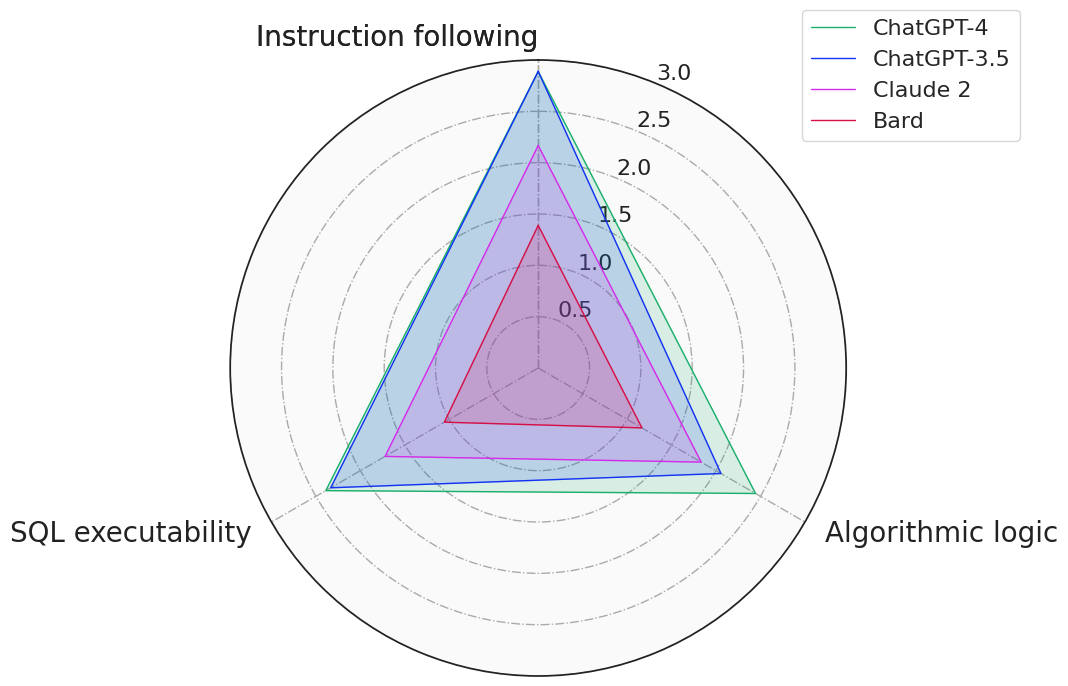

In [28]:
# Each attribute we'll plot in the radar chart.
cat = list(computed_df.columns)
cat += cat[:1]  #to close the radar, duplicate the first column
n_points = len(cat)

#angles need to be converted to radian so we multiply by 2*pi and create the list of angles:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cat))


# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True), facecolor="white")

# Helper function to plot each team on the radar chart.
def add_to_radar(teams, color):
    group_1 = computed_df.loc[teams].tolist()
    group_1 += group_1[:1] #same here duplicate first value to close the radar
    ax.plot(label_loc, group_1, color=color, linewidth=1, label=teams)
    ax.fill(label_loc, group_1, color=color, alpha=0.15)


# Add each car to the chart.
add_to_radar('ChatGPT-4', '#1aaf6c')
add_to_radar('ChatGPT-3.5', '#1232f4')
add_to_radar('Claude 2', '#d42cea')
add_to_radar('Bard', '#d60f46')

ax.tick_params(axis='x', labelsize=20)
# ax.set_fontsize('20')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(label_loc), cat)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), label_loc):
    if 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 3)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')

# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=16)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')


# Add title.
# ax.set_title('Steph curry popcorn rating', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize="16")
plt.savefig('LLM_radar_compare.pdf', dpi=300, bbox_inches = 'tight')